In [1]:
# Standard dist imports
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.pardir))

# Third party imports
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# Project level imports
from utils.constants import *

# Module level constants
DEBUG = False
PHASE = [TRAIN, TEST]
SET_ID = 'set00'

# look in training and testing set (loop over each possible sets in ascending frames plot 10 images (2,5))

In [7]:
# Read in dataset
db = {}
for phase in PHASE:
    src_dir = os.path.abspath(os.pardir)
    filename = os.path.join(src_dir, 'dataset/data_{}.csv'.format(phase))
    db[phase] = pd.read_csv(filename)

print('TRAINING SET: {} | TEST SET: {}'.format(db[TRAIN].shape, db[TEST].shape))

TRAINING SET: (23124, 9) | TEST SET: (34855, 9)


In [46]:
df.head()

,images,valid,set,video,frame,coordinates,label,n_labels,phase
0,/datasets/ee285f-public/caltech_pedestrians_us...,True,set00,V000,804,"[[455.63373111328883, 175.03966972723913, 17.6...","[u'people', u'people']",2,train
1,/datasets/ee285f-public/caltech_pedestrians_us...,True,set00,V000,476,"[[495.56238859180024, 144.0337690631809, 27.05...","[u'people', u'person']",2,train
2,/datasets/ee285f-public/caltech_pedestrians_us...,True,set00,V002,166,"[[587.0190540836822, 145.23950589986555, 27.73...","[u'person', u'person']",2,train
3,/datasets/ee285f-public/caltech_pedestrians_us...,True,set00,V012,1149,"[[115.0669481302777, 158.28045838359475, 71.02...",[u'people'],1,train
4,/datasets/ee285f-public/caltech_pedestrians_us...,True,set00,V006,734,"[[20.62909280196546, 146.47040226162076, 67.26...","[u'people', u'people', u'person']",3,train


In [49]:
df.label.value_counts()

[u'person']                                                                                                                  1717
[u'people']                                                                                                                  1696
[u'person', u'person', u'person']                                                                                            1138
[u'person', u'person', u'person', u'person']                                                                                 1048
[u'person', u'person']                                                                                                        943
[u'people', u'person']                                                                                                        834
[u'people', u'person', u'person']                                                                                             757
[u'people', u'person', u'person', u'person', u'person']                                   

Set: set00


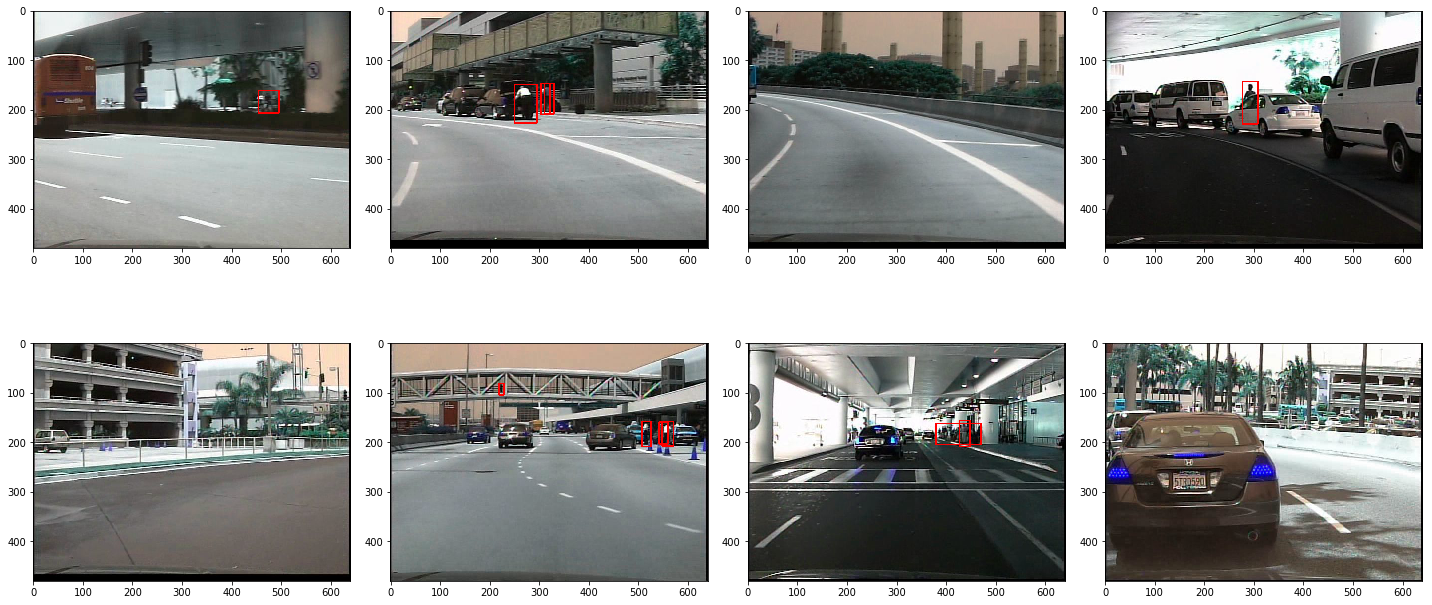

Set: set06


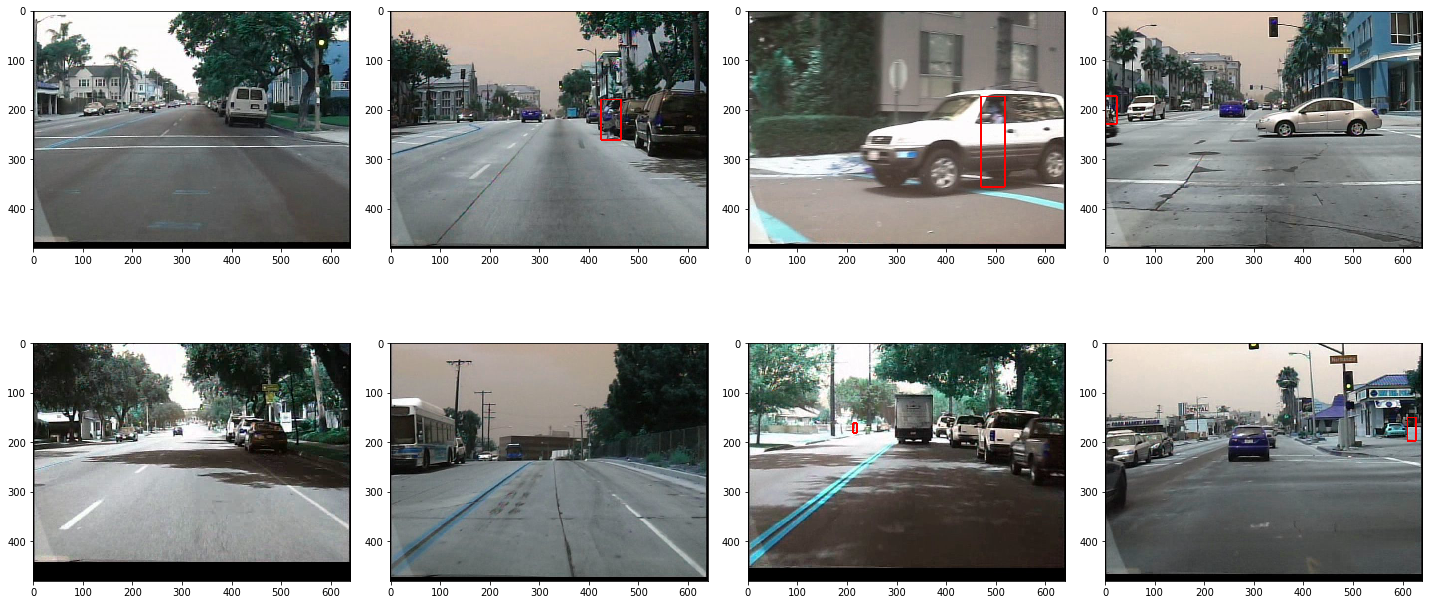

In [18]:
def plot_image(ann):
    n_rows, n_cols = 2, 4
    plt_width, plt_height = 5, 5
    f, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*plt_width, n_rows*plt_height))

    # Grab coordinates and images
    for ii, (image_name, coordinate) in enumerate(ann):
        img = cv2.imread(image_name)
        data = eval(coordinate)

        for datum in data:
            # Draw bounding boxes
            x, y, w, h = [int(v) for v in datum]
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

        ax[ii//4, ii%4].imshow(img)
    plt.tight_layout()
    plt.show()

sample_size = 8
for phase in PHASE:
    grouped_set = db[phase].groupby(Col.SET)
    for idx, set_i in grouped_set:
        smpl = set_i.sample(sample_size)
        imgs = smpl[Col.IMAGES].tolist()
        coordinates = smpl[Col.COORD].tolist()
        ann = zip(imgs, coordinates)
        print('Set: {}'.format(idx))
        plot_image(ann)

Video: V012
Label type: [u'people']
Number of labels: 1


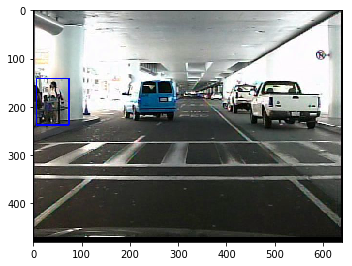

Video: V003
Label type: [u'people']
Number of labels: 1


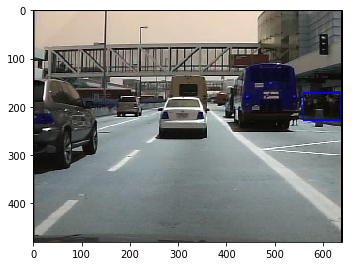

Video: V012
Label type: [u'people']
Number of labels: 1


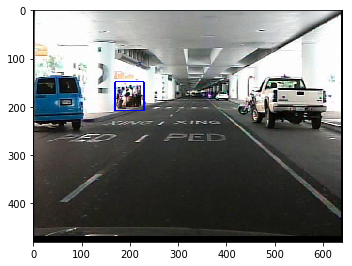

In [62]:
person = df[df[Columns.LABEL] == "[u'people']"].reset_index(drop=True)
for i in range(3):
    idx = np.random.choice(person.shape[0])
    image_name = person.iloc[idx][Columns.IMAGES]
    coordinate = person.iloc[idx][Columns.COORD]
    print('Video: {}'.format(person.iloc[idx][Columns.VIDEO]))
    print('Label type: {}'.format(person.iloc[idx][Columns.LABEL]))
    print("Number of labels: {}".format(person.iloc[idx][Columns.N_LABELS]))
    plot_image(image_name, coordinate)

Video: V002
Label type: [u'person?']
Number of labels: 1


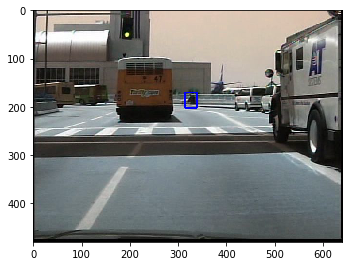

Video: V002
Label type: [u'person?']
Number of labels: 1


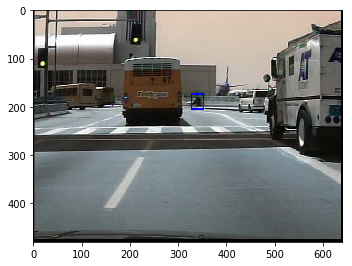

Video: V002
Label type: [u'person?']
Number of labels: 1


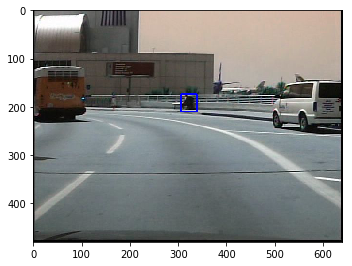

In [63]:
person = df[df[Columns.LABEL] == "[u'person?']"].reset_index(drop=True)
for i in range(3):
    idx = np.random.choice(person.shape[0])
    image_name = person.iloc[idx][Columns.IMAGES]
    coordinate = person.iloc[idx][Columns.COORD]
    print('Video: {}'.format(person.iloc[idx][Columns.VIDEO]))
    print('Label type: {}'.format(person.iloc[idx][Columns.LABEL]))
    print("Number of labels: {}".format(person.iloc[idx][Columns.N_LABELS]))
    plot_image(image_name, coordinate)